# Linear Regression

This is a simple linear regression model and also my first ever project. The notebook explains how I imported the data, cleaned it (not much in this case), split the train file into train and cross validation (there is a seperate file for test data), and fit the model. Also along the way i wrote code to check the root mean squared error and finally founud the r2 score too. I have plotted the graph as well for the predictions.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Importing the training data

In [2]:
#imported and displayed the first few rows of the data
data = pd.read_csv("Linear_train.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


Here we used data.info() to see the details about the data. We observe that "x" has 700 non-null values but "y" has only 699 non-null values. We need to clean the data by deleting the instance that has null values using the dropna() function. In the dropna() function, the inplace=True command means that the changes should be reflected the original file premanentaly

In [3]:
#checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
data.dropna(inplace=True)

The data now will have 699 non-null values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


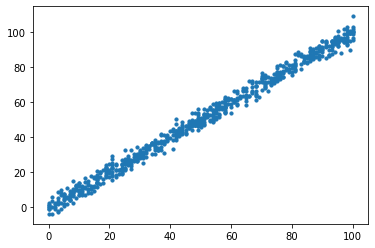

In [6]:
#visualizin the data
plt.scatter(data["x"],data["y"],s=10)

In [7]:
X = data["x"].values.reshape(-1,1)
Y = data["y"].values.reshape(-1,1)

The train data is split into train data and cross validation data 

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_cv, y_train, y_cv = train_test_split(X,Y,test_size=0.3, random_state=143)


In [9]:
#fitting a linear regression model using the training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

Just to check the progress, we check the predictions using the first five values. We observe that the predicted values are almost matching with the actual labels 

In [10]:
some_data = X_train[:5]
some_labels = y_train[:5]
print("Predictions: " ,lin_reg.predict(some_data))
print("Labels:",some_labels)

Predictions:  [[33.76440245]
 [63.88885236]
 [17.69802917]
 [16.69388084]
 [21.71462249]]
Labels: [[30.48882921]
 [66.7346608 ]
 [21.21321959]
 [13.24991628]
 [18.56241391]]


Here, we are checking the root mean squared error

In [11]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_train)
mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)
rmse

2.7396101133706083

The red line here is the fitted line on our data. The scattered data is the cross validation data. 

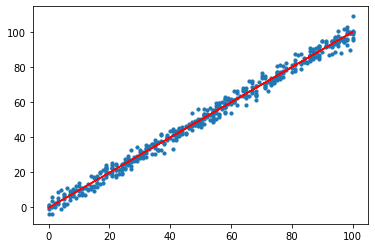

In [12]:
plt.scatter(X_train, y_train,s=10)
plt.plot(X_train, predictions, color='red')
plt.show()

We find the root mean squared error using the cross validation data

In [13]:
cv_predictions = lin_reg.predict(X_cv)
cv_mse = mean_squared_error(y_cv, cv_predictions)
cv_rmse = np.sqrt(cv_mse)
cv_rmse

2.962299120833467

### Importing the test data 

Now we will import the test data file and check for the root mean squared error using out trained model

In [14]:
#importing the data
data_test = pd.read_csv("Linear_test.csv")
X_test = data["x"].values.reshape(-1,1)
y_test = data["y"].values.reshape(-1,1)

In [15]:
final_predictions = lin_reg.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.8083686160906525

In [16]:
#checking the r2 score 
from sklearn.metrics import r2_score
score=r2_score(y_test, final_predictions)
score

0.9906788622737417